<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
            padding-top: 20px">

<h1 style="padding: 10px;
              color:white;">
<center>Bank Market Response Prediction</center>
</h1>
</div>

  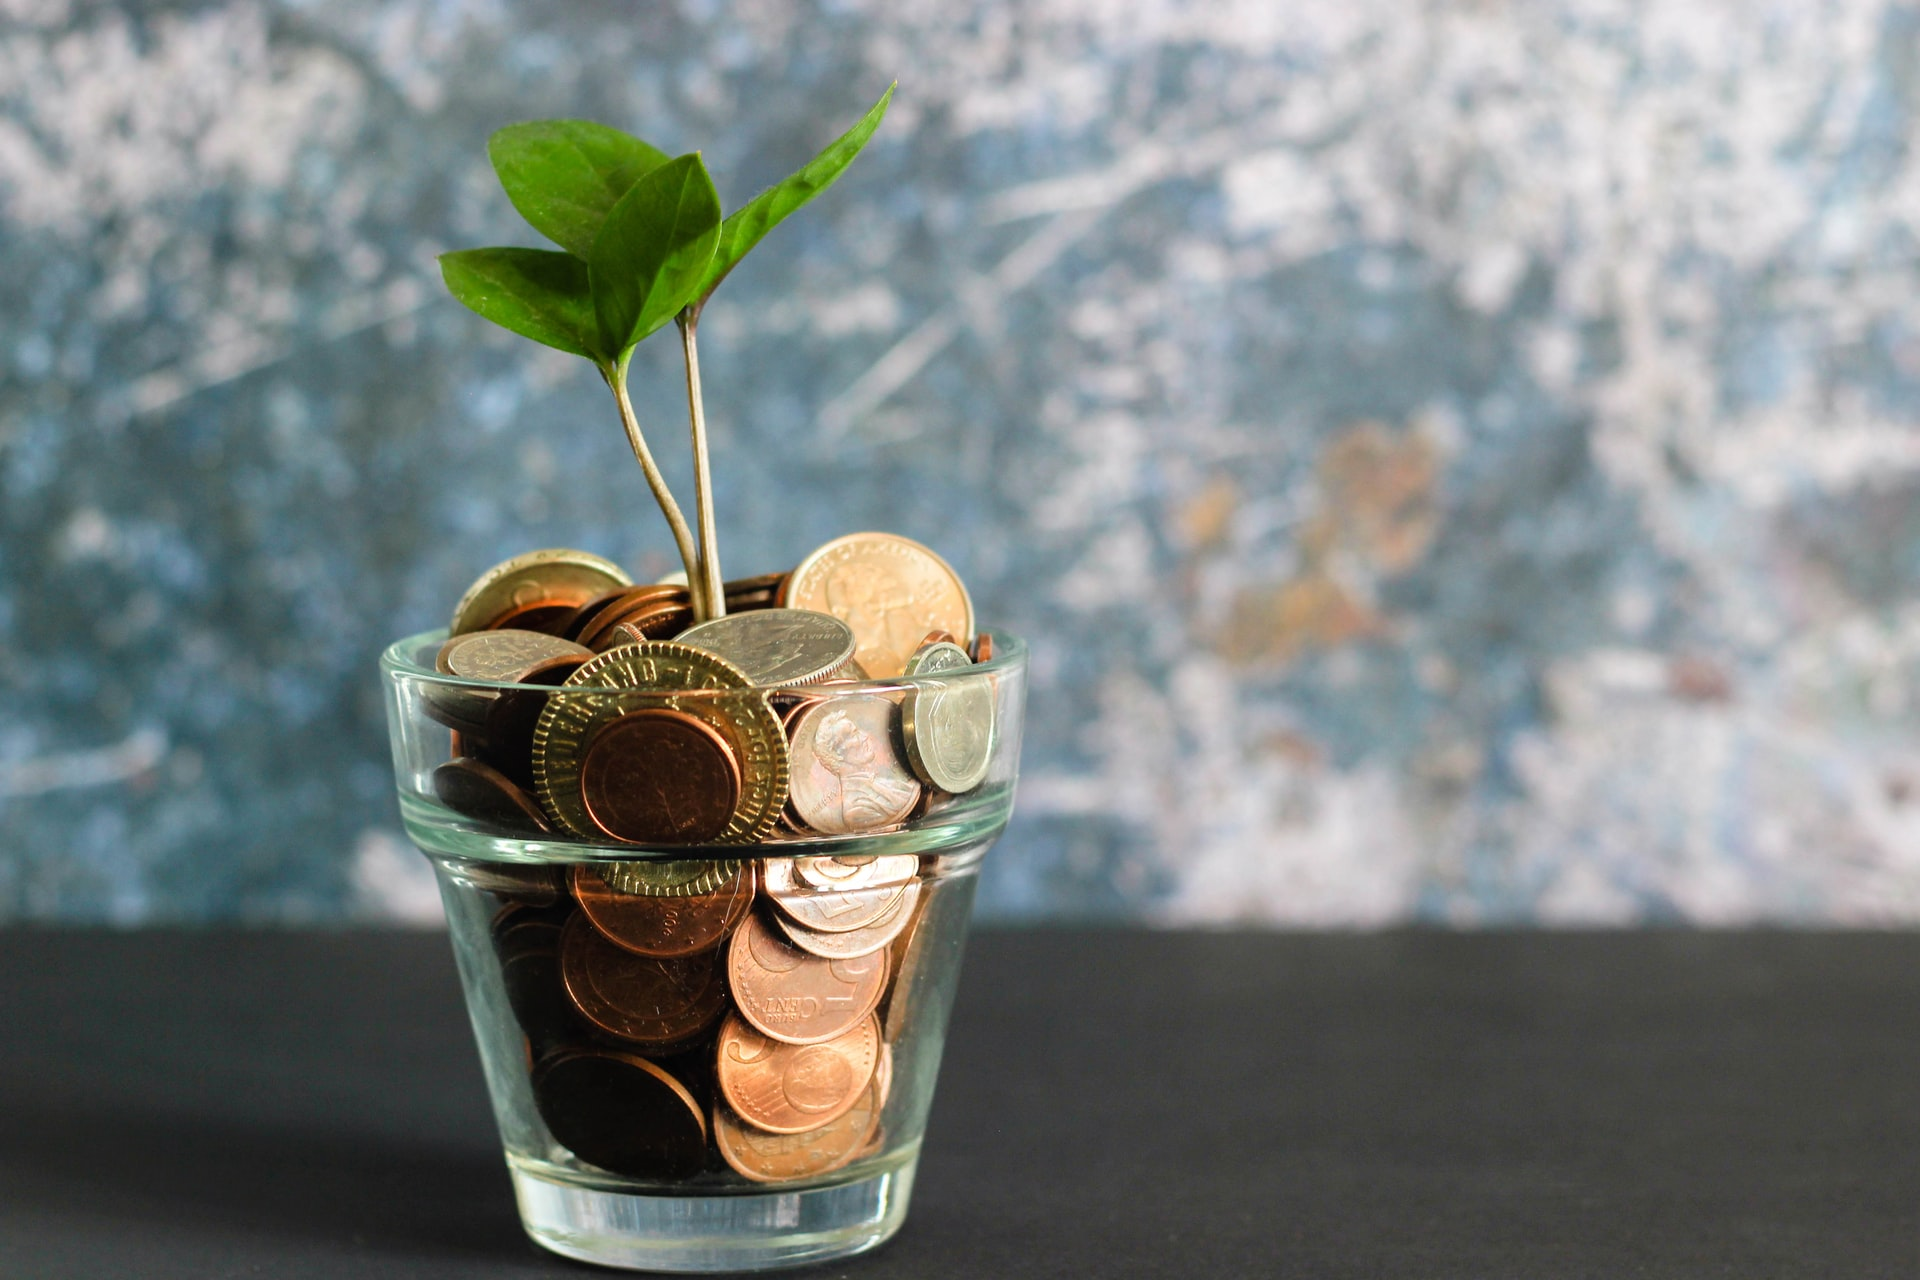

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;font-size:25px">
    IMPORTING
</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
import shap
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;font-size:25px">
    LOADING DATA
</p>
</div>

In [2]:
df = pd.read_csv("../input/bank-marketing-response-predict/train.csv")
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no


In [3]:
test = pd.read_csv("../input/bank-marketing-response-predict/test.csv")
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,53608,32,management,single,tertiary,no,12569,no,no,cellular,1,jul,2,295,2,success
1,51055,25,services,single,secondary,no,801,no,no,cellular,5,jun,2,-1,0,unknown
2,52573,46,blue-collar,married,secondary,no,1728,yes,no,unknown,26,may,2,-1,0,unknown
3,50458,39,management,divorced,secondary,no,51,no,no,unknown,17,jun,2,-1,0,unknown
4,52272,31,services,single,tertiary,no,1626,no,no,unknown,31,jul,1,-1,0,unknown


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;font-size:25px">
 TAKING A PEEK...
    </p>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.7+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         4291 non-null   int64 
 1   age        4291 non-null   int64 
 2   job        4291 non-null   object
 3   marital    4291 non-null   object
 4   education  4291 non-null   object
 5   default    4291 non-null   object
 6   balance    4291 non-null   int64 
 7   housing    4291 non-null   object
 8   loan       4291 non-null   object
 9   contact    4291 non-null   object
 10  day        4291 non-null   int64 
 11  month      4291 non-null   object
 12  campaign   4291 non-null   int64 
 13  pdays      4291 non-null   int64 
 14  previous   4291 non-null   int64 
 15  poutcome   4291 non-null   object
dtypes: int64(7), object(9)
memory usage: 536.5+ KB


In [6]:
df.describe()

,ID,age,balance,day,campaign,pdays,previous
count,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000
mean,16434.500000,41.091142,1483.774437,15.641103,2.659130,45.555478,0.688967
std,3715.393317,11.305560,3311.055181,8.368983,2.863507,104.449411,2.049696
min,10000.000000,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,13217.250000,32.000000,102.000000,8.000000,1.000000,-1.000000,0.000000
50%,16434.500000,39.000000,515.000000,16.000000,2.000000,-1.000000,0.000000
75%,19651.750000,49.000000,1591.750000,21.000000,3.000000,-1.000000,0.000000
max,22869.000000,95.000000,102127.000000,31.000000,43.000000,854.000000,58.000000


In [7]:
test.describe()

,ID,age,balance,day,campaign,pdays,previous
count,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,52145.000000,40.919133,1474.078536,15.821254,2.611979,46.317409,0.709392
std,1238.849332,11.313492,3118.919570,8.337266,2.843344,104.036285,2.025399
min,50000.000000,18.000000,-3313.000000,1.000000,1.000000,-1.000000,0.000000
25%,51072.500000,32.000000,88.000000,8.000000,1.000000,-1.000000,0.000000
50%,52145.000000,39.000000,515.000000,16.000000,2.000000,-1.000000,0.000000
75%,53217.500000,49.000000,1612.000000,21.500000,3.000000,-1.000000,0.000000
max,54290.000000,94.000000,58932.000000,31.000000,44.000000,842.000000,29.000000


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;font-size:25px">
 EDA TIME!!!
    </p>
</div>

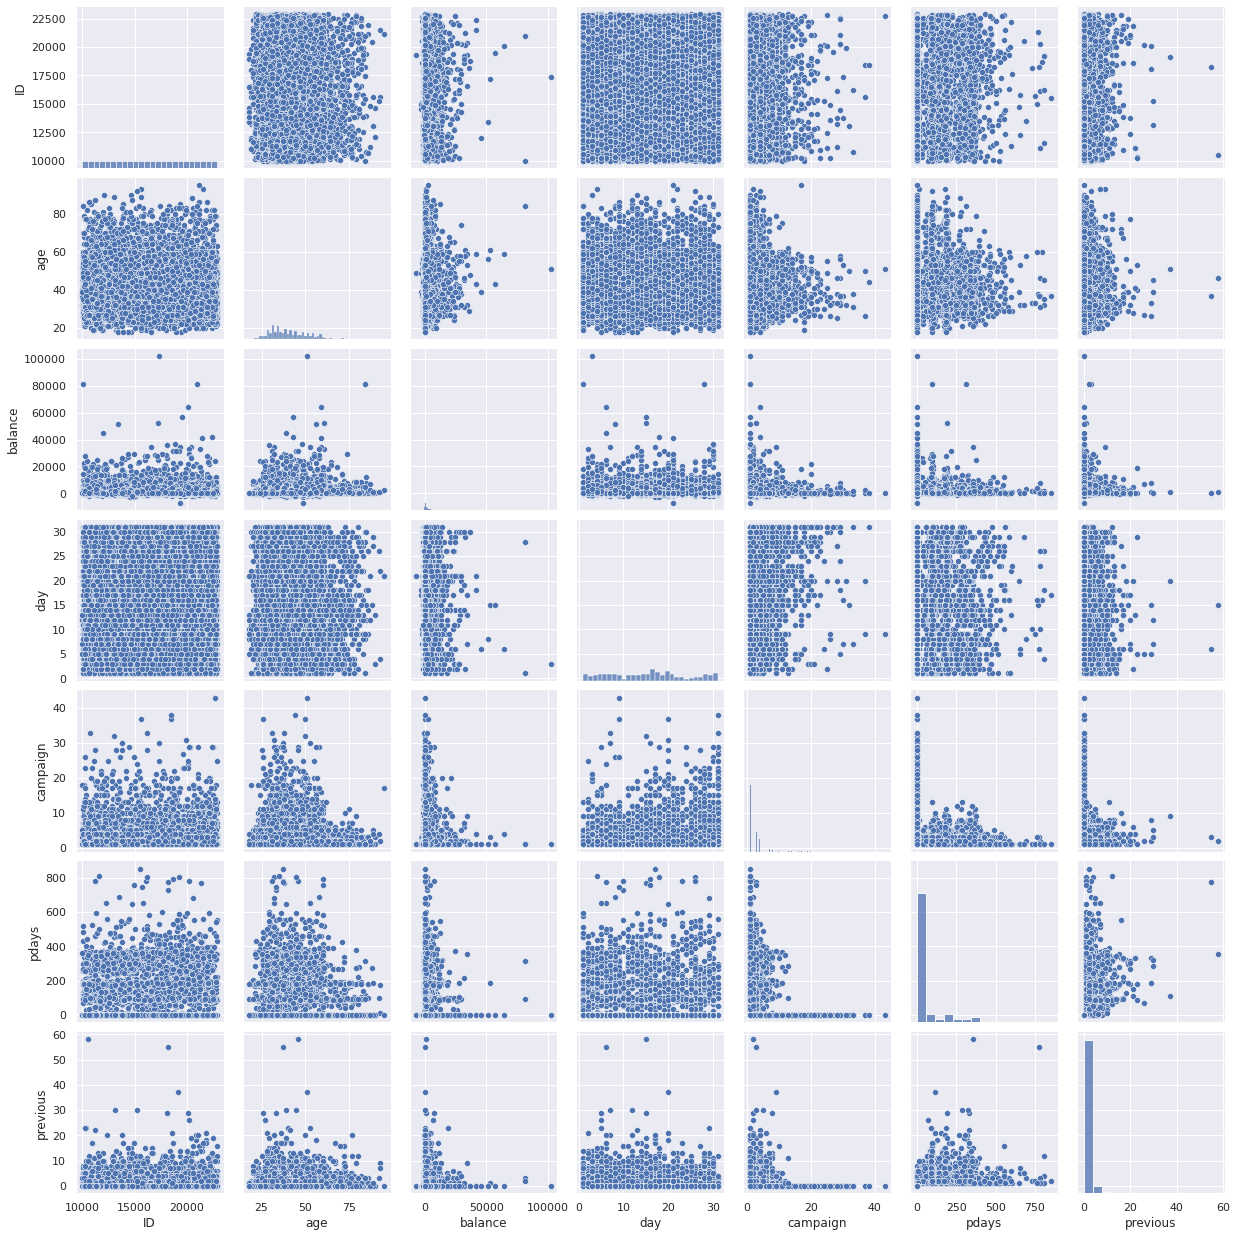

In [8]:
sns.set()
sns.pairplot(df)
plt.show()

In [9]:
#creating a custom template to use
custom_template = {
    "layout": go.Layout(
        font={
            "family": "Nunito",
            "size": 14,
            "color": "#707070",
        },
        title={
            "font": {
                "family": "Lato",
                "size": 20,
                "color": "#1f1f1f",
            },
        },
        plot_bgcolor="#ffffff",
        paper_bgcolor="#ffffff",
        colorway=px.colors.qualitative.G10,
    )
}

In [10]:
#function to format the title of the plots
def format_title(title, subtitle=None, subtitle_font_size=14):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [11]:
#plot a histogram to get an idea on the distribution of the ages.
ages = px.histogram(
        data_frame=df,
        x= 'age',
        labels={"age":"Age"},
        opacity=0.75,
        title=format_title("Age Distribution", "Just getting a look at how it is distributed"),
        template=custom_template)



fig = go.Figure(data=ages)
fig.add_vline(x=np.mean(df.age), line_dash = 'dash', line_color = 'firebrick')
iplot(fig)

<p style="font-size: 14px;">The distribution seems to be <span style="color: crimson">right skewed</span>, meaning that the customers, most of them are <span style="color: crimson">middle aged</span>. As you can see the mean of the distribution seems to be around <span style="color: crimson">41</span>.</p>

In [12]:
#plotting a histogram to get the status and the count of status of the customers.
married = px.histogram(
        data_frame=df,
        x= 'marital',
        labels={'material': 'Material'},
        title=format_title("Marital Status Counts", "Getting to know the status of the customer"),
        template=custom_template)

fig = go.Figure(data=married)
iplot(fig)

<p style="font-size:14px">Most of the customers are <span style="color:crimson">married</span> who are around <span style="color: #202EF9">7490</span>, followed by <span style="color:crimson">bachelors</span> who are around <span style="color:#202EF9">3905</span>.</p>

In [13]:
ed_s = px.bar(
    data_frame=df,
    x = 'education',
    y = 'balance',
    title=format_title("Education and Balance", "Looking whether both are related or not?"),
    labels={'education':"Education",
    'balance':"Balance"},
    template=custom_template
    )

fig = go.Figure(data=ed_s)
iplot(fig)

<p>As you can see in the above graph people with <span style="color: crimson">Secondary education</span> have higher balance, I mean it's just a very <span style="color: crimson">minute difference</span> between <span style="color: crimson">secondary and tertiary</span>. I am considering <span style="color: crimson">unknown</span> as <span style="color: crimson">dropouts/illiterates</span>, and they have the <span style="color: crimson">lowest balance</span>.</p>

In [14]:
mean_balance = np.mean(df.balance)
mean_balance

1483.7744366744366

In [15]:
ed_s = px.histogram(
    data_frame=df,
    x = 'age',
    y = 'balance',
    color='y',
    labels={'age':"Age", "balance":"Balance"},
    title=format_title("Age and Balance", "Also whether the customer subed to a term deposit or not"),
    template=custom_template
    )

fig = go.Figure(data=ed_s)
fig.add_hline(y=mean_balance, line_dash='dash', line_color="firebrick")
iplot(fig)

In [16]:
ed_s = px.box(
    data_frame=df,
    x = 'job',
    color= 'default',
    title=format_title("Job and Default Credit", "Which job holder has Default credit"),
    template=custom_template
    )

fig = go.Figure(data=ed_s)
iplot(fig)

<p>In the above boxplot, if we observe there are two outliers for not having a default credit.</p>

In [17]:
ages = px.histogram(
        data_frame=df,
        x= 'pdays',
        labels={"pdays":"No. of days since last contacted"},
        opacity=0.75,
        title=format_title("pday Distribution", "Just getting a look at how it is distributed"),
        template=custom_template,
        nbins=20)



fig = go.Figure(data=ages)
fig.add_vline(x=np.mean(df.age), line_dash = 'dash', line_color = 'firebrick')
iplot(fig)

<p style="font-size:14px">There are a lot <span style="color: crimson">-1</span> values in the <span style="color: crimson">pdays</span> column. Since there was no mention of what it means, I am going to <span style="color: crimson">assume</span> that it as <span style="color: crimson">unknown</span>. If it becomes a problem in the future we can just impute those values with some other value most probably the median.</p>

<p>On average the last contacted was <span style="color: crimson">47-48</span>.</p>

<p style="font-size:14px">Now that we've seen how our data is and how they are related let's do some <span style="color:crimson">Feature Engieering</span></p>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;font-size:25px">
     FEATURE ENGINEERING
    </p>
</div>

By the suggestion of <a href="https://www.kaggle.com/thedevastator">thedevastator</a> I am going to try some things which may or may not be correct, so feel free to correct me if you think I did some mistake. With that said let's move on with the feature engineering.

First of all I am going to be creating a new feature by merging 4 cols, namely <span style="color:crimson">job</span>, <span style="color:crimson">marital</span>, <span style="color:crimson">education</span>, <span style="color:crimson">default</span>. This will be helpful in reducing the dimensionality of the data.

In [18]:
df['jmed'] = df['job'] + ' ' + df['marital']+ ' ' + df['education']+ ' ' + df['default']
df['jmed'].head()

0     technician single tertiary no
1      services single secondary no
2    management single secondary no
3     technician married unknown no
4        admin. single secondary no
Name: jmed, dtype: object

In [19]:
no = df[df['housing'] == 'no']
yes = df[df['housing'] == 'yes']

In [20]:
no_avg = np.mean(no['balance'])
yes_avg =  np.mean(yes['balance'])

In [21]:
cond = [
    (df['balance'] >= no_avg) & (df['housing'] == 'no'),
    (df['balance'] <= yes_avg) & (df['housing'] == 'yes'),
    (df['balance'] <= no_avg) & (df['housing'] == 'no'),
    (df['balance'] >= yes_avg) & (df['housing'] == 'yes')
]

cat = [1, 1, 0, 0]
df['housing_balance'] = np.select(cond, cat)

In [22]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,jmed,housing_balance
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no,technician single tertiary no,1
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no,services single secondary no,1
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no,management single secondary no,0
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no,technician married unknown no,1
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no,admin. single secondary no,0


In [23]:
df['p_previous'] = df['pdays'] + df['previous']
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,jmed,housing_balance,p_previous
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no,technician single tertiary no,1,-1
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no,services single secondary no,1,-1
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no,management single secondary no,0,-1
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no,technician married unknown no,1,-1
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no,admin. single secondary no,0,-1


<p>I created 3 new feature first one is <span style="color:crimson">jmed(job+marital+education+default)</span>, second one is <span style="color:crimson">housing_balance</span> which is created using the conditions above. The third one is <span style="color:crimson">p_previous</span> which is created by adding <span style="color:crimson">pdays</span> and <span style="color:crimson">previous</span> columns. This was done so as to reduce the dimensionality of the data.</p>

Now we will try to find the <span style="color:crimson">feature importance</span> for Random Forest. Before that we need to <span style="color:crimson">encode</span> our <span style="color:crimson">categorical variables</span>

In [24]:
le = LabelEncoder()
for col in ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'jmed', ]:
    df[col] = le.fit_transform(df[col])

In [25]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,jmed,housing_balance,p_previous
0,13829,29,9,2,2,0,18254,0,0,0,11,8,2,-1,0,3,0,166,1,-1
1,22677,26,7,2,1,0,512,1,1,2,5,6,3,-1,0,3,0,137,1,-1
2,10541,30,4,2,1,0,135,0,0,0,14,1,2,-1,0,3,0,87,0,-1
3,13689,41,9,1,3,0,30,1,0,0,10,5,1,-1,0,3,0,161,1,-1
4,11304,27,0,2,1,0,321,0,1,2,2,11,1,-1,0,3,0,13,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,9,1,1,0,1167,1,0,0,30,0,1,87,5,0,1,157,1,92
12866,17259,31,11,1,1,0,111,0,0,0,21,9,2,93,2,0,1,186,0,95
12867,15200,37,10,2,2,0,1316,1,0,0,18,9,1,172,2,0,0,180,0,174
12868,13775,42,4,1,2,0,479,1,0,2,28,8,2,-1,0,3,0,81,1,-1


In [26]:
#lets ceate a temp df called 'temp'
temp = df
X = temp.drop('y', axis=1)
y = temp['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [27]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

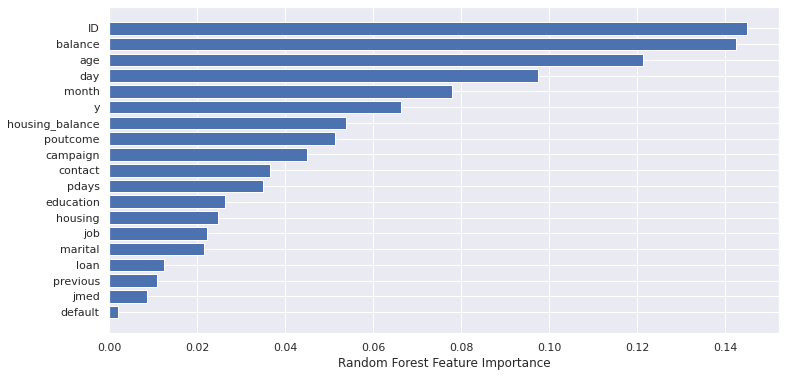

In [28]:
fig = plt.figure(figsize=(12, 6))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

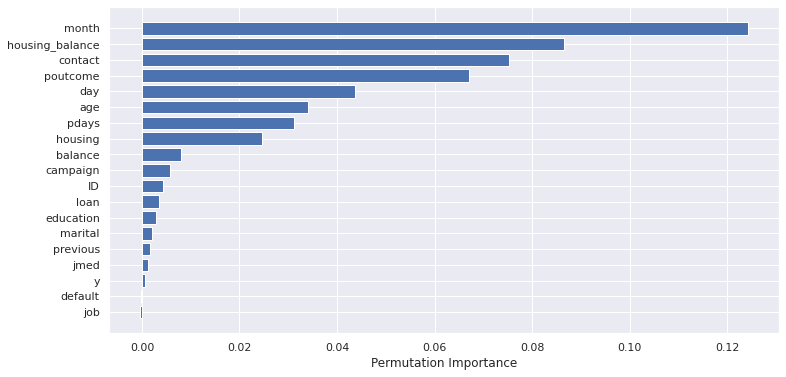

In [29]:
perm_importance = permutation_importance(rf, X_test, y_test)
fig = plt.figure(figsize=(12, 6))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

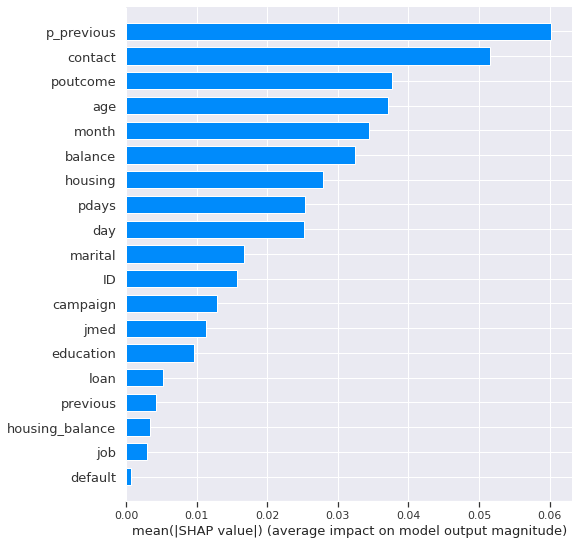

In [30]:
explainer = shap.TreeExplainer(rf)
fig = plt.figure(figsize=(12, 6))
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

<p>As you can see above I performed feature importance of Random Forest in Three ways and let me say this, This is the first time I ever did so I went with all the ways I found online. Now, I don't know what to take into consideration. Let me know which and why(like you would for a 5 year old in very detailed way) also any suggestions regarding feature engineering would be great.</p>

<h1>To Be Continued...</h1>